# DATA 512: Part 2 - Extension Plan

In this notebook I obtain, process, and filter both my wildfire and AQI dataset from Part 1 (Common Analysis) and my new real estate dataset proposed in my extension plan. This notebook is an intermediate step between the Common Analysis code and final analysis code, to ensure for clean and properly formatted data, before performing any analysis. 

## Data Import and Preprocessing Steps
In this step I preprocess datasets by:
1. Creating a year column in AQI data
2. Ensuring consistent date formats
3. Merging smoke and AQI data found in `smoke_data_df`
4. Refine the `calculate_smoke_impact()` function to include nonlinear distance weighting and normalization
5. Load in and filter the real estate data bby filtereing for coordinates within 650 miles of Hartford, CT
6. Format the List Year column in the real estate dataset

Outputs: 
- `selected_processed_wildfires2`: Properly processed with the correct date formats, smoke estimates, and AQI data.
- `filtered_real_estate_df`: Property sale data within 650 miles of Hartford, formatted and processed

In [39]:
# importing relavant libraries for this analysis
import pandas as pd
import numpy as np
import datetime as dt 

In [3]:
# Load real estate data into a dataframe
real_estate_df = pd.read_csv('Real_Estate_Sales_2001-2022_GL_20241117.csv')

# Load wildfire data into a dataframe
smoke_data_df = pd.read_csv('selected_processed_wildfires.csv')

# Load AQI data into a dataframe
aqi_df = pd.read_csv('aqi_data.csv')

/var/folders/kp/42tvxzv924xdtdyzydmjjp380000gn/T/ipykernel_3165/2475777184.py:5: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  real_estate_df = pd.read_csv(real_estate_file_path)


In [12]:
smoke_data_df

,year,discovery_date,fire_name,fire_size_acres,fire_type,average_distance_miles,listed_dates,days_burning
0,1963,1963-07-04,COLORED (3),30.743401,Wildfire,329.436683,Listed Wildfire Discovery Date(s): 1963-07-04 ...,119
1,1965,1965-10-30,ABRAMS MTN (2),3.978242,Wildfire,385.967070,Listed Wildfire Discovery Date(s): 1965-10-30 ...,1
2,1965,1965-07-31,SANDY BOTT (2),1.989492,Wildfire,390.728688,Listed Wildfire Discovery Date(s): 1965-07-31 ...,92
3,1965,1965-07-24,SKYLAND (2),1.989099,Wildfire,371.768926,Listed Wildfire Discovery Date(s): 1965-07-24 ...,99
4,1965,1965-08-17,LEWIS PEAK (2),0.248821,Wildfire,400.599643,Listed Wildfire Discovery Date(s): 1965-08-17 ...,75
...,...,...,...,...,...,...,...,...
819,2019,2019-06-07,Lower Cadillac Mountain Road (2),0.158165,Wildfire,288.374551,Listed Wildfire Discovery Date(s): 2019-06-07 ...,146
820,2019,2019-06-28,Canarsie Pier East (2),0.062014,Wildfire,100.005917,Listed Wildfire Discovery Date(s): 2019-06-28 ...,125
821,2019,2019-06-23,GKP Beach Center (2),0.045496,Wildfire,113.399914,Listed Wildfire Discovery Date(s): 2019-06-23 ...,130
822,2020,2020-07-24,Sam Hatcher (2),191.156495,Wildfire,536.204759,Listed Wildfire Discovery Date(s): 2020-07-24 ...,99


In [40]:
#creating new year column in AQI data
aqi_df['year'] = aqi_df['date'].dt.year

In [27]:
# Ensure both datasets have consistent date formats
smoke_data_df["discovery_date"] = pd.to_datetime(smoke_data_df["discovery_date"])
aqi_df["date"] = pd.to_datetime(aqi_df["date"])

# Merge the smoke data with AQI data on the discovery date
merged_data = pd.merge(smoke_data_df, aqi_df, left_on="discovery_date", right_on="date", how="left")

# Display the first few rows of the merged dataset to verify the results
merged_data

,year,discovery_date,fire_name,fire_size_acres,fire_type,average_distance_miles,listed_dates,days_burning,smoke_impact,normalized_smoke_impact,date,daily_max_aqi
0,1963,1963-07-04,COLORED (3),30.743401,Wildfire,329.436683,Listed Wildfire Discovery Date(s): 1963-07-04 ...,119,0.033710,0.033154,NaT,NaN
1,1965,1965-10-30,ABRAMS MTN (2),3.978242,Wildfire,385.967070,Listed Wildfire Discovery Date(s): 1965-10-30 ...,1,0.000027,0.000027,NaT,NaN
2,1965,1965-07-31,SANDY BOTT (2),1.989492,Wildfire,390.728688,Listed Wildfire Discovery Date(s): 1965-07-31 ...,92,0.001199,0.001198,NaT,NaN
3,1965,1965-07-24,SKYLAND (2),1.989099,Wildfire,371.768926,Listed Wildfire Discovery Date(s): 1965-07-24 ...,99,0.001425,0.001424,NaT,NaN
4,1965,1965-08-17,LEWIS PEAK (2),0.248821,Wildfire,400.599643,Listed Wildfire Discovery Date(s): 1965-08-17 ...,75,0.000116,0.000116,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
819,2019,2019-06-07,Lower Cadillac Mountain Road (2),0.158165,Wildfire,288.374551,Listed Wildfire Discovery Date(s): 2019-06-07 ...,146,0.000278,0.000278,2019-06-07,38.0
820,2019,2019-06-28,Canarsie Pier East (2),0.062014,Wildfire,100.005917,Listed Wildfire Discovery Date(s): 2019-06-28 ...,125,0.000775,0.000775,2019-06-28,51.0
821,2019,2019-06-23,GKP Beach Center (2),0.045496,Wildfire,113.399914,Listed Wildfire Discovery Date(s): 2019-06-23 ...,130,0.000460,0.000460,2019-06-23,37.0
822,2020,2020-07-24,Sam Hatcher (2),191.156495,Wildfire,536.204759,Listed Wildfire Discovery Date(s): 2020-07-24 ...,99,0.065821,0.063745,2020-07-24,43.0


In [16]:
# making sure minimum number of days burning in wildfire is 1 (wildfire must be burning for at least one day)
smoke_data_df["days_burning"] = smoke_data_df["days_burning"].apply(lambda x: max(x, 1))

In [17]:
# Refine the calculate_smoke_impact function to include nonlinear distance weighting and normalization
def refined_calculate_smoke_impact(df):
    """
    Calculate a refined smoke impact metric with:
    - Nonlinear distance weighting (inverse-square law)
    - Normalization using log transformation
    """
    # Nonlinear distance weighting (inverse-square law)
    df["smoke_impact"] = df.apply(
        lambda row: (row["fire_size_acres"] * row["days_burning"]) / (row["average_distance_miles"] ** 2)
        if row["average_distance_miles"] > 0 else np.nan,  # Avoid division by zero
        axis=1
    )
    
    # Normalization using log transformation (log(1 + x) to handle zeros)
    df["normalized_smoke_impact"] = np.log1p(df["smoke_impact"])
    
    return df

# Example of applying this to a DataFrame (assuming `selected_processed_wildfires` exists)
# Note: This requires `selected_processed_wildfires` to have relevant columns like 'fire_size_acres',
# 'days_burning', and 'average_distance_miles'.

# Apply the refined smoke impact calculation
# Uncomment below to use in actual implementation if the dataframe is loaded.
selected_processed_wildfires2 = refined_calculate_smoke_impact(smoke_data_df)

# Annual aggregation of smoke impact (for modeling trends)
def aggregate_annual_smoke_impact(df):
    """
    Aggregate smoke impact on an annual basis.
    """
    return (
        df.groupby("year")["normalized_smoke_impact"]
        .sum()
        .reset_index(name="annual_smoke_impact")
    )

In [29]:
#new wildfire dataset with correct smoke estimates
selected_processed_wildfires2.to_csv('selected_processed_wildfires2.csv', index=False)

Now I filter for real estate sales within 650 miles of Hartford, CT

In [28]:
from geopy.distance import geodesic
import re

# Define the coordinates for Hartford, CT
hartford_coords = (41.7637, -72.6851)
max_distance = 650  # miles

# Function to extract latitude and longitude from the 'Location' column
def extract_coords(location):
    match = re.search(r"POINT \(([-\d.]+) ([-\d.]+)\)", str(location))
    if match:
        lon, lat = float(match.group(1)), float(match.group(2))
        return lat, lon
    return None, None

# Apply the function to extract coordinates and filter locations within 650 miles from Hartford
real_estate_df['coords'] = real_estate_df['Location'].apply(extract_coords)
real_estate_df['distance_to_hartford'] = real_estate_df['coords'].apply(
    lambda x: geodesic(hartford_coords, x).miles if x[0] is not None else None
)

# Filter the data to only include properties within 650 miles of Hartford
filtered_real_estate_df = real_estate_df[real_estate_df['distance_to_hartford'] <= max_distance]

# Display the filtered dataset
filtered_real_estate_df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,coords,distance_to_hartford
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),"(41.35014, -73.06822)",34.770320
5,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.6819,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445),"(41.79445, -72.89675)",11.137631
27,200207,2020,11/23/2020,Bristol,BROAD PLACE LOTS 225-6 AND 224,8400.0,38500.0,0.2181,Vacant Land,NaN,25 - Other,MULTIPLE LOT SALE,NaN,POINT (-72.90406 41.66996),"(41.66996, -72.90406)",13.040081
33,20188,2020,07/19/2021,Burlington,206 COVEY RD,286860.0,540000.0,0.5312,Residential,Single Family,NaN,NaN,NaN,POINT (-72.97635 41.79258),"(41.79258, -72.97635)",15.177270
56,200192,2020,05/10/2021,East Haddam,96 LONGWOOD DR,83020.0,175000.0,0.4744,Residential,Single Family,NaN,NaN,NaN,POINT (-72.33294 41.51729),"(41.51729, -72.33294)",24.931244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,NaN,NaN,NaN,POINT (-73.577612999 41.148977983),"(41.148977983, -73.577612999)",62.822551
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,07 - Change in Property,NEW CONSTRUCTION - NOT COMPLETE FOR 10/1/2022,NaN,POINT (-72.663607 41.712487),"(41.712487, -72.663607)",3.704947
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,NaN,NaN,NaN,POINT (-73.515726977 41.057837988),"(41.057837988, -73.515726977)",65.076986
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,NaN,NaN,NaN,POINT (-72.368005967 41.289124997),"(41.289124997, -72.368005967)",36.648054


Let's now visualize this data to see if it makes sense! 

/var/folders/kp/42tvxzv924xdtdyzydmjjp380000gn/T/ipykernel_3165/3646668324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_real_estate_df['List Year'] = pd.to_numeric(filtered_real_estate_df['List Year'], errors='coerce')


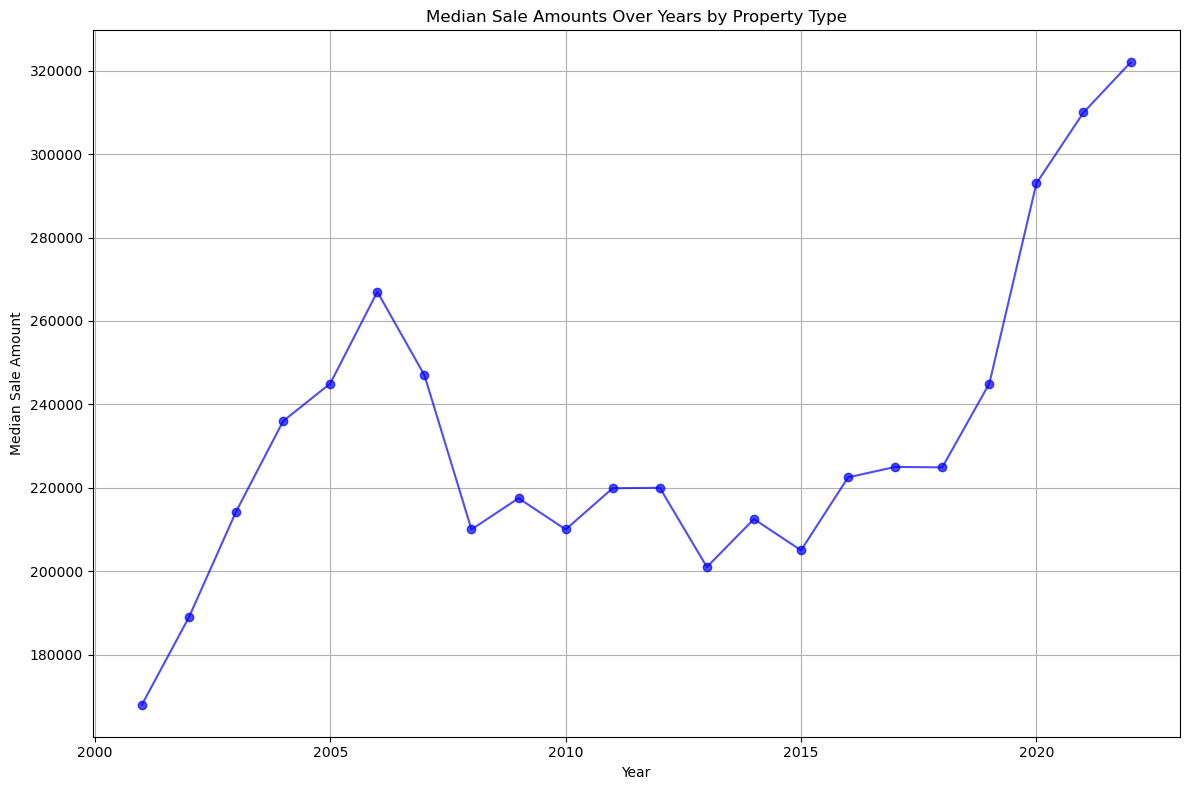

In [59]:
import matplotlib.pyplot as plt

# Ensure 'List Year' is numeric and clean
filtered_real_estate_df['List Year'] = pd.to_numeric(filtered_real_estate_df['List Year'], errors='coerce')

# Group by 'List Year' and 'Property Type', calculate median sale amount
median_sales = filtered_real_estate_df.groupby('List Year')['Sale Amount'].median().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(median_sales['List Year'], median_sales['Sale Amount'], marker='o', linestyle='-', color='blue', alpha=0.7)
plt.title('Median Sale Amounts Over Years by Property Type')
plt.xlabel('Year')
plt.ylabel('Median Sale Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

It seems that there is a general upwards trend of this median property sale amounts from 2000 to 2020. This matches trends nationally as well! We're ready to save this into its own dataset for future analysis and model building. 

In [30]:
# create new filtered real estate dataset with only hartford property sales
filtered_real_estate_df.to_csv('filtered_real_estate_df.csv', index=False)